In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 

In [14]:
EMBEDDING_MODEL = 'GanymedeNil_text2vec-large-chinese'
EMBEDDING_TYPE = 'title&pyq'
SEED = 19260817

In [15]:
train_df = pd.read_csv(f'../../data/curated/{EMBEDDING_MODEL}/train_dataset_{EMBEDDING_TYPE}.csv')
val_df = pd.read_csv(f'../../data/curated/{EMBEDDING_MODEL}/val_dataset_{EMBEDDING_TYPE}.csv')
test_df = pd.read_csv(f'../../data/curated/{EMBEDDING_MODEL}/test_dataset_{EMBEDDING_TYPE}.csv')

### fit the model

In [16]:
train_X = train_df.drop('label', axis = 1)
train_Y = train_df['label']
test_X = test_df.drop('label', axis = 1)
test_Y = test_df['label']
val_X = val_df.drop('label', axis = 1)
val_Y = val_df['label']

In [17]:
RF_model = RandomForestRegressor(n_estimators=200, max_depth=24, max_samples=0.4, max_features=0.7, ccp_alpha=0.0001, random_state=SEED, n_jobs=-1)

In [18]:
RF_model.fit(train_X, train_Y)

RandomForestRegressor(ccp_alpha=0.0001, max_depth=24, max_features=0.7,
                      max_samples=0.4, n_estimators=200, n_jobs=-1,
                      random_state=19260817)

In [19]:
val_y_pred = RF_model.predict(val_X)
val_r2 = r2_score(val_Y, val_y_pred)
val_r2

0.10048518325412736

In [20]:
test_y_pred = RF_model.predict(test_X)
test_r2 = r2_score(test_Y, test_y_pred)
test_r2

0.051936923995594686

### get feature importance

In [21]:
feature_importance = RF_model.feature_importances_

In [22]:
importance_df = pd.DataFrame({
    'Feature': train_X.columns,
    'Importance': feature_importance
})

In [23]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
41,title_9,0.040857
45,title_13,0.038345
36,title_4,0.035751
61,title_29,0.035086
59,title_27,0.033225
...,...,...
24,pyq_text_24,0.007835
5,pyq_text_5,0.007567
4,pyq_text_4,0.007366
17,pyq_text_17,0.006905


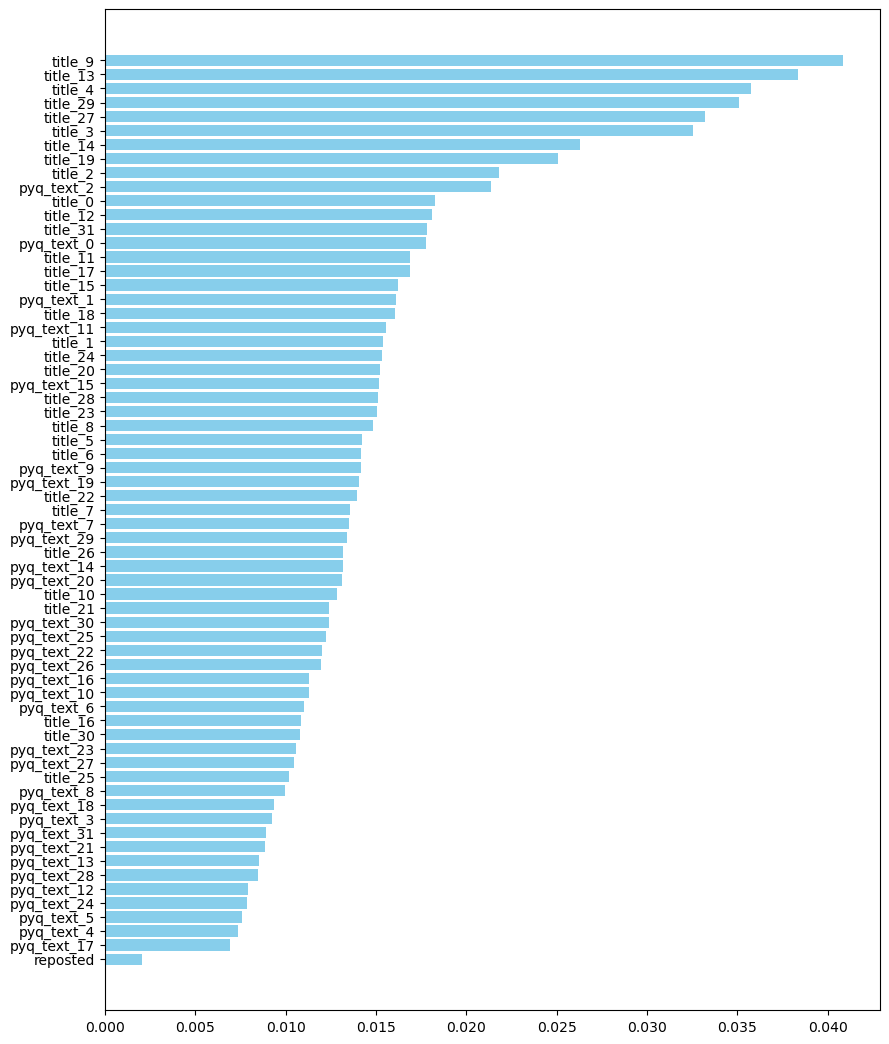

In [24]:
plt.figure(figsize=(10,13))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel = 'Feature'
plt.ylabel = 'Importance'
plt.title = 'RF Feature Importance Plot'
plt.gca().invert_yaxis()
plt.show()